In [1]:
## Plotly is not included in your dojo-env
!pip install plotly

In [2]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import json

## importing plotly 
import plotly.express as px

In [3]:
## Load in csv.gz
df = pd.read_csv('Data/Title_Basics.csv')
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
3,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"
4,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002.0,NaN,126,Drama


 # Getting a List of Unique Genres

 - The genres column should be separated into separate genres.
 - example: "Comedy, Fantasy, Romance" is actually 3 genres that the movie belongs to, not one combined genre
 - Right now, the genre column above contains a string with the genres separated by a comma.

In [4]:
# convert strings to lists of strings 
#creating a column with a list of genres
# This will convert the strings from above into lists of strings into a new 'genres_split' column.

df['genres_split'] = df['genres'].str.split(',')
df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genres_split
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance","[Comedy, Fantasy, Romance]"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama,[Drama]
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama,[Drama]
3,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi","[Comedy, Horror, Sci-Fi]"
4,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002.0,NaN,126,Drama,[Drama]
...,...,...,...,...,...,...,...,...,...,...
86974,tt9914942,movie,Life Without Sara Amat,La vida sense la Sara Amat,0,2019.0,NaN,74,Drama,[Drama]
86975,tt9915872,movie,The Last White Witch,My Girlfriend is a Wizard,0,2019.0,NaN,97,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]"
86976,tt9916170,movie,The Rehearsal,O Ensaio,0,2019.0,NaN,51,Drama,[Drama]
86977,tt9916190,movie,Safeguard,Safeguard,0,2020.0,NaN,95,"Action,Adventure,Thriller","[Action, Adventure, Thriller]"


In [5]:
## Create a new column with the single-string genres as a  list of strings

#basics['genres_split'] = basics['genres'].str.split(',')
#basics

In [6]:
#  List of unique genres from genres_split and save as exploded_genres
# use .explode() to separate the list of genres into new rows: 
# one row for each genre a movie belonged to
exploded_genres = df.explode('genres_split')
exploded_genres

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genres_split
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance",Comedy
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance",Fantasy
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance",Romance
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama,Drama
...,...,...,...,...,...,...,...,...,...,...
86977,tt9916190,movie,Safeguard,Safeguard,0,2020.0,NaN,95,"Action,Adventure,Thriller",Action
86977,tt9916190,movie,Safeguard,Safeguard,0,2020.0,NaN,95,"Action,Adventure,Thriller",Adventure
86977,tt9916190,movie,Safeguard,Safeguard,0,2020.0,NaN,95,"Action,Adventure,Thriller",Thriller
86978,tt9916362,movie,Coven,Akelarre,0,2020.0,NaN,92,"Drama,History",Drama


In [7]:
# using .unique() to get the unique genres from the genres_split column
# running through sorted function to get the genres sorted alphabetically
# also saving this list as unique_genres to use later

unique_genres = sorted(exploded_genres['genres_split'].unique())
unique_genres

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

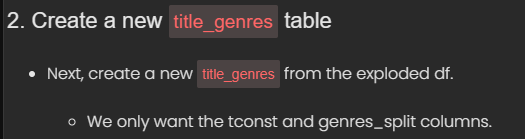

In [8]:
## here we only want tconst and genres_split columns in this new dataframe called title_genres
title_genres = exploded_genres[['tconst','genres_split']].copy()
title_genres.head()

,tconst,genres_split
0,tt0035423,Comedy
0,tt0035423,Fantasy
0,tt0035423,Romance
1,tt0062336,Drama
2,tt0069049,Drama


In [9]:
## Get the string column coverted to a list of strings in earch row
# gentres_split = basics['genres'].str.split(",")

## explode the series using.explode () and take the .unique() entries only.
# unique_genres = genres_split.explode().unique()
# unique_genres

# 3. Create a genre mapper dictionary to replace string genres with integers

In [10]:
# Using the dict and zip functions to make a dictionary with 
# the genre strings as the keys and the integers genre_ids as the values.
genre_ints = range(len(unique_genres))
genre_map = dict(zip(unique_genres, genre_ints))
genre_map


{'Action': 0,
 'Adult': 1,
 'Adventure': 2,
 'Animation': 3,
 'Biography': 4,
 'Comedy': 5,
 'Crime': 6,
 'Drama': 7,
 'Family': 8,
 'Fantasy': 9,
 'Game-Show': 10,
 'History': 11,
 'Horror': 12,
 'Music': 13,
 'Musical': 14,
 'Mystery': 15,
 'News': 16,
 'Reality-TV': 17,
 'Romance': 18,
 'Sci-Fi': 19,
 'Sport': 20,
 'Talk-Show': 21,
 'Thriller': 22,
 'War': 23,
 'Western': 24}

In [11]:
## make a dictionary with list of unique genres as the key and the 
## new integer id as values
genre_id_map = dict(zip(unique_genres, range(len(unique_genres))))
genre_id_map

{'Action': 0,
 'Adult': 1,
 'Adventure': 2,
 'Animation': 3,
 'Biography': 4,
 'Comedy': 5,
 'Crime': 6,
 'Drama': 7,
 'Family': 8,
 'Fantasy': 9,
 'Game-Show': 10,
 'History': 11,
 'Horror': 12,
 'Music': 13,
 'Musical': 14,
 'Mystery': 15,
 'News': 16,
 'Reality-TV': 17,
 'Romance': 18,
 'Sci-Fi': 19,
 'Sport': 20,
 'Talk-Show': 21,
 'Thriller': 22,
 'War': 23,
 'Western': 24}

In [12]:
## overwriting the original id column 
df['genre_id'] = df['genres_split'].replace(genre_map)
df = df.drop(columns='genres_split')

# Convert the genre map dictionary into a dataframe

In [13]:
## There are several ways to do this. Here is one suggested approach
## Manually make datafram with named cols from the .keys and .values

genre_lookup = pd.DataFrame({'Genre_Name': genre_id_map.keys(),
                             'Genre_ID': genre_id_map.values()})


In [15]:
genre_lookup.head()

,Genre_Name,Genre_ID
0,Action,0
1,Adult,1
2,Adventure,2
3,Animation,3
4,Biography,4


# Now your genres table is all set for your MySQL database!

___________________________________

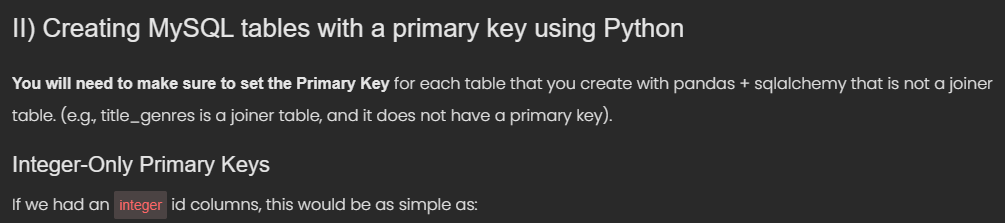

In [14]:
## Set the dataframe index and use index=True 
df.set_index('genre_id').to_sql('genres',conn, index=True)


NameError: name 'conn' is not defined

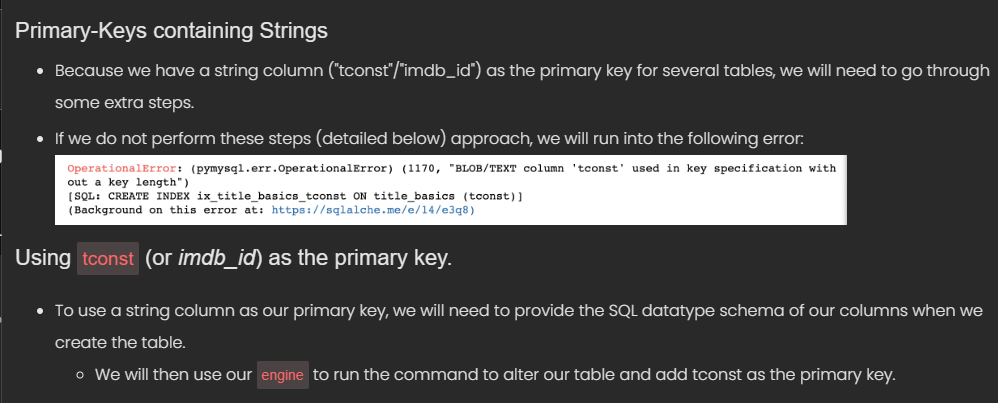

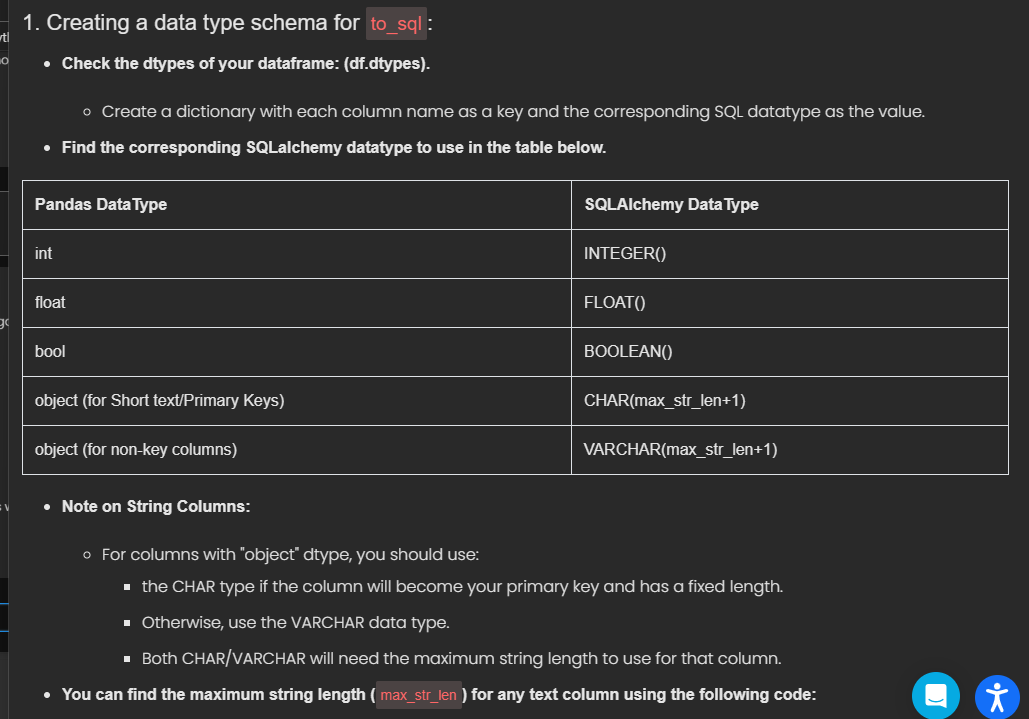

In [ ]:
## get max string length
max_str_len = df['column'].fillna('').map(len).max()


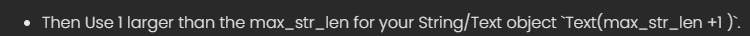

In [ ]:
## Example
from sqlalchemy.types import *
## Calculate max string lengths for object columns
key_len = tmdb['imdb_id'].fillna('').map(len).max()
cert_len = basics['certification'].fillna('').map(len).max()
## Create a schema dictonary using Sqlalchemy datatype objects
df_schema = {
    "imdb_id": CHAR(key_len+1), 
    "budget": FLOAT(),
    "revenue": FLOAT(),
    'certification':CHAR(key_len+1)}


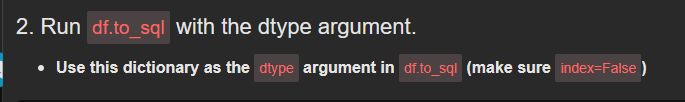

In [ ]:
# Save to sql with dtype and index=False
tmdb.to_sql('tmdb_data',conn, dtype=df_schema, if_exists='replace',index=False)


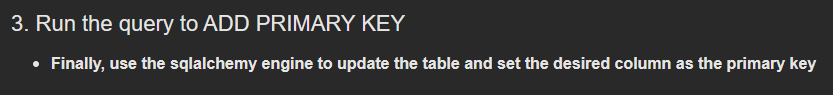

In [ ]:
engine.execute('ALTER TABLE tmdb_data ADD PRIMARY KEY (`imdb_id`);')